# Churn prediction using logistical regression
We want to produce and save a model capable of predicting customer churn using a PCA analysis to break the data into two principal components, before fitting a logistical regression curve to the binary results.

## Import prequisites and preprocess the data
Given the nature of the dataset, we do the following, fairly simple pre-processing steps:
1. Remove columns of text-data that are non-discretizable
2. Remove all rows with incomplete data (empty strings, spaces, NaN values)
3. Map Female -> 1 and Male -> 0 in "gender"
4. For each column:
    1. Map all strings with a substring containing 'No' -> 0 and 'Yes' -> 1
    2. Transform all values to numeric datatypes
    3. Normalize the column using a Min-Max normalization

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [58]:
# load dataset
# https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data
data = pd.read_csv("data\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# preprocess the data
data.drop(columns=["customerID", "InternetService", "Contract", "PaymentMethod"], inplace=True)   # drop text columns
data.replace(["", " "], np.nan, inplace=True)   # replace empty str with nan
data.dropna(inplace=True)   # remove all nan values
data["gender"].replace(('Female', 'Male'), (1, 0), inplace=True)  # replace female/male with binary values

for col in data.columns:                                                            
    data.loc[:, col] = data.loc[:, col].apply(lambda x: 0 if type(x) is str and 'No' in x else x)   # change all substrings with 'No' to 0
    data.loc[:, col] = data.loc[:, col].apply(lambda x: 1 if type(x) is str and 'Yes' in x else x)  # change all substrings with 'Yes' to 1
    data.loc[:, col] = pd.to_numeric(data.loc[:, col])                                              # make sure column is numeric
    data.loc[:, col]=(data.loc[:, col]-data.loc[:, col].min())/(data.loc[:, col].max()-data.loc[:, col].min())  # normalize the column data (min/max)

# split data into test/training set
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.33)

C:\Users\maxim\AppData\Local\Temp\ipykernel_1688\801466075.py:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, col]=(data.loc[:, col]-data.loc[:, col].min())/(data.loc[:, col].max()-data.loc[:, col].min())  # normalize the column data (min/max)
C:\Users\maxim\AppData\Local\Temp\ipykernel_1688\801466075.py:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, col] = data.loc[:, col].apply(lambda x: 1 if type(x) is str and 'Yes' in x else x)  # change all substrings with 'Yes' to 1
C:\Users\maxim\AppData\Local\Temp\ipyker

## PCA 
We use a principal component analysis to squeeze the data into two dimensions. Although this is not strictly necessary and may lead to a loss of accuracy, it does make data significantly easier to visualize.

In [61]:
pca = PCA(n_components=2)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

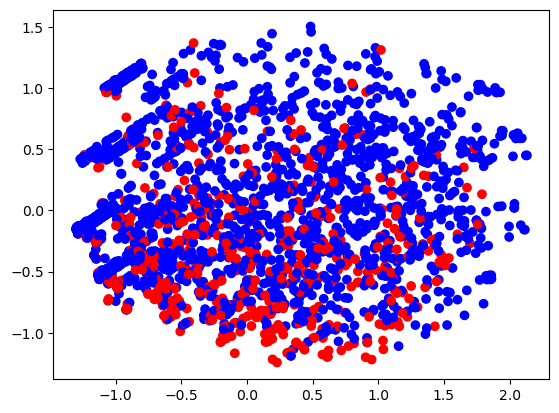

In [62]:
colors = np.where(y_test == 1, 'red', 'blue')
plt.figure()
plt.scatter(x_test[:, 0], x_test[:, 1], c = colors)
plt.show()

# Logistical regressor

In [63]:
log_regressor = LogisticRegression()
log_regressor.fit(x_train, y_train)

LogisticRegression()

In [64]:
y_pred = log_regressor.predict(x_test)
score = log_regressor.score(x_test, y_test)
output = classification_report(y_test, y_pred)
print(output)

              precision    recall  f1-score   support

         0.0       0.76      0.97      0.86      1695
         1.0       0.73      0.18      0.29       626

    accuracy                           0.76      2321
   macro avg       0.75      0.58      0.57      2321
weighted avg       0.75      0.76      0.70      2321

